Final glacier length: 3718.9629201946636m
Final max ice thickness: 166.160060477337m
Final max velocity: 0.014135362657956018883m/yr
B min: -0.7325138699338848
B max: 5.556166464508979e-05
ICE:  [ 28.2412089   31.83767872  37.04094412  44.16115503  51.4108767
  68.67624541  82.51536438  91.49914012  97.02366089  93.01239811
  87.11739558  81.56181377  78.82783036  83.93699222  92.58334795
 116.25081233 136.32912878 125.44479778 119.88814286 120.02978574
 121.20386412 123.076247   126.88399376 132.12484578 141.6645489
 150.9276074  158.41293069 164.21748723 166.16006048 161.17287554
 144.5172164  130.02335499 119.13808205 115.07245077 121.12369681
 124.21109794 123.46205416 120.98923053 116.66584785 119.43606746
 120.03455361 115.58300241 110.77012822 105.54554684  99.84727177
  93.60152547  85.46280433  75.82212394  64.97066761  53.1657529 ]
SLOPE:  [0.25166002 0.27118476 0.25091551 0.21389802 0.18544225 0.1249545
 0.09906294 0.08859569 0.08450234 0.0947608  0.10989228 0.12707637
 0.13

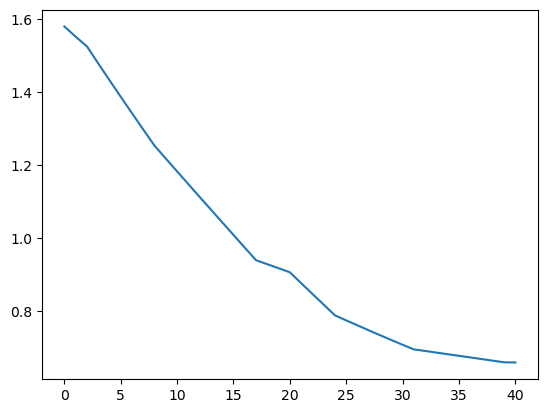

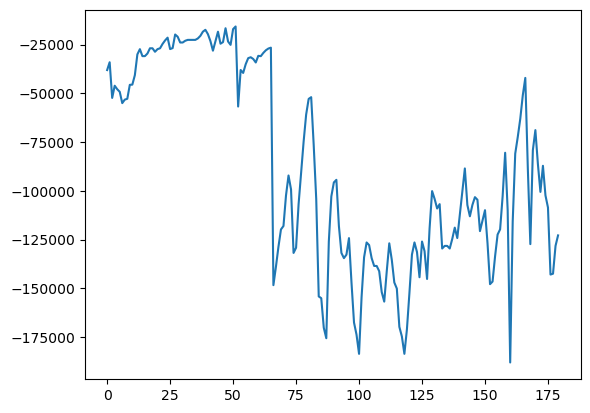

In [2]:
from matplotlib.animation import FuncAnimation
from glacierSim import glacierSim
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import numpy as np
%matplotlib inline

fig, ax = plt.subplots() #initialize plotting variables
_ = plt.close(fig) #used to prevent an empty plot from displaying

ela=1880
time=1040
save=1
gamma=0.011
quiet=True
# accumfactor= 7.86148311299302e-07
# meltfactor=-4.010722406223074e-05
# meltfactor=-0.005
# accumfactor=0.0008
accumfactor=2.6238836270398025e-08
ice_meltfactor= -1.000000082740371e-10
snow_meltfactor=-1.0
start_time=1000
ice = [
    50.81674576, 58.0492316, 65.39974357, 69.26584673, 75.6541392, 84.5574082,
    93.16036408, 112.38704694, 124.70816911, 131.82922523, 133.94461492, 128.04731581,
    119.78368355, 114.48489418, 112.37514056, 119.75831875, 135.23782532, 160.12199208,
    157.96061715, 146.35333828, 145.00609809, 144.29791671, 144.11173286, 146.38344403,
    149.4198206, 157.63435841, 165.81155222, 172.08082136, 176.45849045, 177.06836948,
    168.17467552, 149.15732577, 133.66691108, 119.98983147, 118.42297763, 122.25852634,
    120.05965747, 116.45899098, 109.25399911, 102.33371904, 104.5723128, 96.17898237,
    86.71000822, 75.76864291, 62.64653003, 45.85246872, 20.18519449, 0.0, 0.0, 0.0
]
model = glacierSim(ela=ela, time=time, save=save,gamma=gamma,quiet=quiet, ice_meltfactor=ice_meltfactor, snow_meltfactor=snow_meltfactor, accumfactor=accumfactor, initial_ice=ice, start_time=start_time)
# plt.plot(glac.x, glac.topo)
# plt.plot(glac.x,glac.ice+glac.topo, color='b')
# plt.gca().set_aspect('equal', adjustable='box')
# plt.show()
#print(model.dx)
anim = FuncAnimation(fig, model.run_model, model.frames, init_func=model.init(ax,ela=ela, time=time, save=save,gamma=gamma,quiet=quiet, ice_meltfactor=ice_meltfactor, snow_meltfactor=snow_meltfactor, accumfactor=accumfactor, initial_ice=ice, start_time=start_time), blit=False, repeat=False)
vid = HTML(anim.to_jshtml())
print("ICE: ",model.ice)
print("SLOPE: ",model.ice_slope)
print("MASS BALANCE: ",model.b)
print("WINTER MB DIFF: ", model.winter_mb-model.calculated_winter_mb)
print("SUMMER MB DIFF: ", model.summer_mb-model.calculated_summer_mb)
#print('CALCULATED ANNUAL MB: ', model.calculated_annual_mb)
print('ANNUAL MB DIFF: ',np.array(model.calculated_annual_mb)-np.array(model.annual_mb))
print("VOLUME DIFF: ", model.volume_validation-model.volume_data)
print("DONE")
plt.plot(model.yearly_volume_change)
plt.show()
plt.plot(model.volume_validation-model.volume_data)
plt.show()
#plt.plot(model.timestep_list)
#print(model.calculated_annual_mb, model.calculated_summer_mb, model.calculated_winter_mb)
#anim.save('animation.mp4', writer='ffmpeg', fps=15, dpi=100)
#print(model.calculated_summer_mb, model.calculated_winter_mb)
vid